<a href="https://colab.research.google.com/github/2303A52247/PNS/blob/main/PNS_Lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
file_path = '/content/car_data_250.csv'
df = pd.read_csv(file_path)

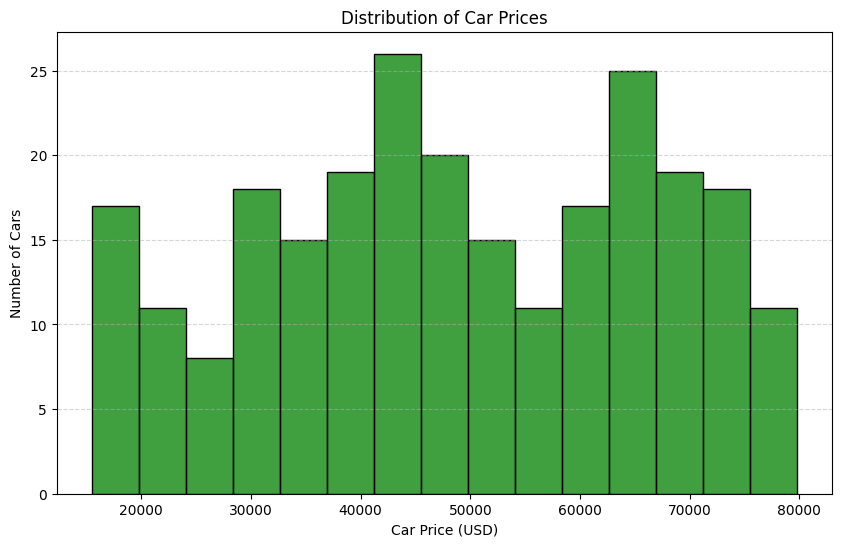

The most common price range is around: $63061.53


In [3]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=15,  color="green")
plt.xlabel("Car Price (USD)")
plt.ylabel("Number of Cars")
plt.title("Distribution of Car Prices")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()
most_common_range = df['Price'].value_counts().idxmax()
print(f"The most common price range is around: ${most_common_range}")

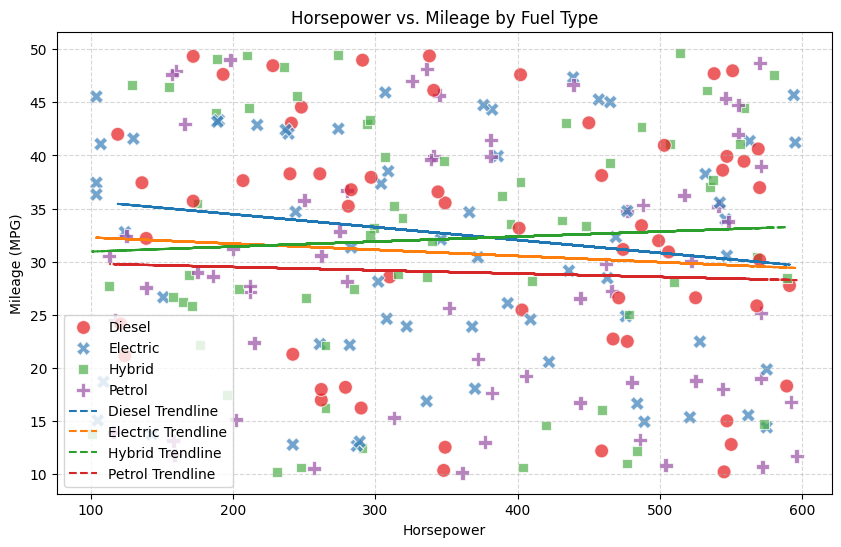

In [4]:
import numpy as np
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Horsepower', y='Mileage', hue='Fuel Type', palette='Set1', style='Fuel Type', s=100, alpha=0.7)
plt.xlabel("Horsepower")
plt.ylabel("Mileage (MPG)")
plt.title("Horsepower vs. Mileage by Fuel Type")
plt.legend(title="Fuel Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
for fuel in df["Fuel Type"].unique():
    subset = df[df["Fuel Type"] == fuel]
    if len(subset) > 1:
        z = np.polyfit(subset['Horsepower'], subset['Mileage'], 1)
        p = np.poly1d(z)
        plt.plot(subset['Horsepower'], p(subset['Horsepower']), linestyle='dashed', label=f"{fuel} Trendline")

plt.legend()
plt.show()

<ipython-input-5-26ab65107d6a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_counts.index, y=brand_counts.values, palette="viridis")


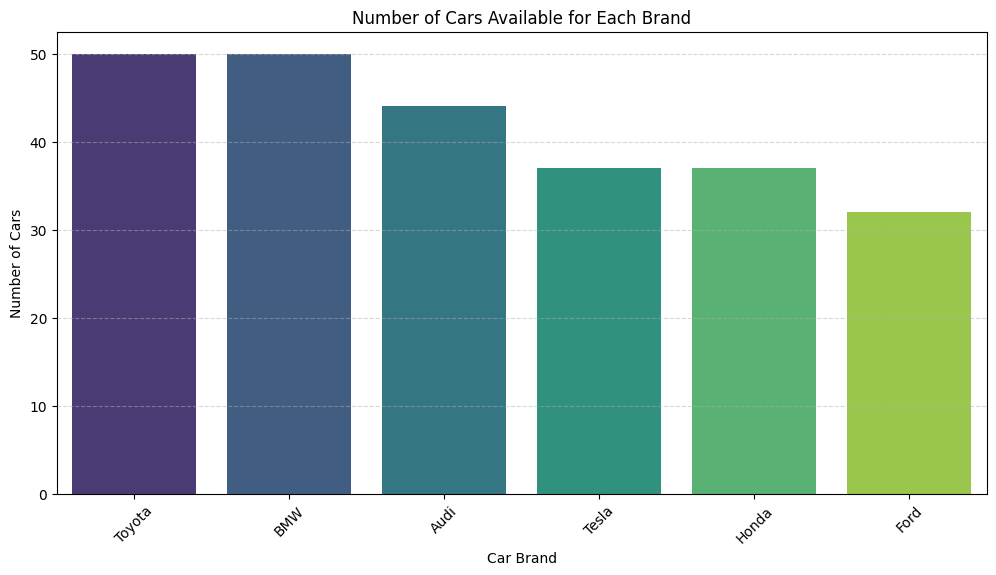

The most popular car brand is: Toyota


In [5]:
brand_counts = df['Brand'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=brand_counts.index, y=brand_counts.values, palette="viridis")
plt.xlabel("Car Brand")
plt.ylabel("Number of Cars")
plt.title("Number of Cars Available for Each Brand")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()
most_popular_brand = brand_counts.idxmax()
print(f"The most popular car brand is: {most_popular_brand}")

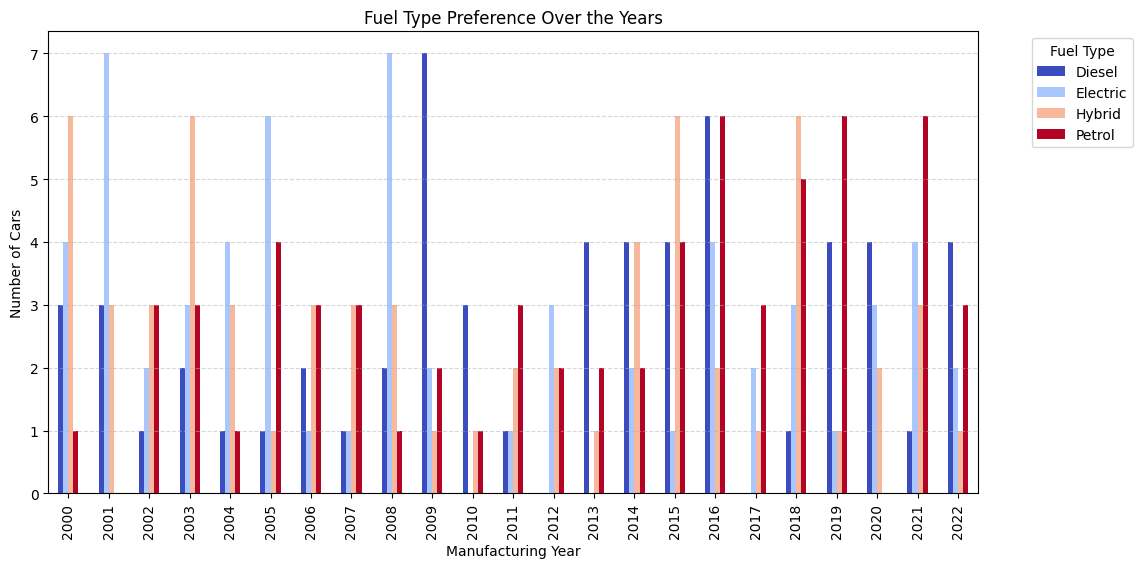

In [6]:
fuel_type_year_counts = df.groupby(['Year', 'Fuel Type']).size().unstack()
fuel_type_year_counts.plot(kind='bar', figsize=(12, 6), colormap='coolwarm')
plt.xlabel("Manufacturing Year")
plt.ylabel("Number of Cars")
plt.title("Fuel Type Preference Over the Years")
plt.legend(title="Fuel Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()